# **Assignment Week-10**: Centrality

**Nama:** Chairunnisa Mahadewi Budi Santosa

**NIM:** 1301213104

**Kelas:** IF-44-DS01

Buatlah visualisasi jaringan yang merepresentasikan jalur transportasi yang menghubungkan kota-kota besar di **Jawa Barat.**
Tentukan kota terpenting berdasarkan nilai degree centrality dan betweenness centrality.
Update ukuran node berdasarkan nilai degree centrality


**Source Dataset:** Daftar Pustaka Analisa DAOP I

**Import Library dan Fetch Dataset**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_jalurKereta = pd.read_csv('/content/drive/MyDrive/3. DATASET/JALUR KERETA INDONESIA.csv')
df_jalurKereta.head()

,kereta,stasiun_awal,kota_kab_awal,stasiun_akhir,kota_kab_akhir
0,Kereta api Tegal Arum,Stasiun Jakarta Kota,Jakarta Barat,Stasiun Tegal,Tegal
1,KRD Tanjung Priok-Cikampek,Stasiun Tanjung Priok,Jakarta Utara,Stasiun Cikampek,Kabupaten Karawang
2,KRD Tanjung Priok-Cikampek,Stasiun Tanjung Priok,Jakarta Utara,Stasiun Purwakarta,Purwakarta
3,Kereta api Rangkas Jaya,Stasiun Tanahabang,Jakarta Pusat,Stasiun Rangkasbitung,Kabupaten Lebak
4,Kereta api Langsam,Stasiun Tanahabang,Jakarta Pusat,Stasiun Rangkasbitung,Kabupaten Lebak


**Filter Data, Fokus pada Rute Jawa Barat**

In [ ]:
west_java_cities = ['Bandung', 'Bogor', 'Depok', 'Sukabumi', 'Cirebon', 'Bekasi', 'Karawang', 'Purwakarta']

df_west_java = df_jalurKereta[
    df_jalurKereta['kota_kab_awal'].isin(west_java_cities) |
    df_jalurKereta['kota_kab_akhir'].isin(west_java_cities)
]

print(df_west_java)

                         kereta           stasiun_awal  kota_kab_awal  \
2    KRD Tanjung Priok-Cikampek  Stasiun Tanjung Priok  Jakarta Utara   
15         Kereta api Argo Jati        Stasiun Cirebon        Cirebon   
17  Kereta api Argo Parahyangan        Stasiun Bandung        Bandung   
19     Kereta api New Argo Jati        Stasiun Cirebon        Cirebon   
20  Kereta api Cirebon Ekspress        Stasiun Cirebon        Cirebon   
27  Kereta api Patas Purwakarta     Stasiun Purwakarta     Purwakarta   

           stasiun_akhir kota_kab_akhir  
2     Stasiun Purwakarta     Purwakarta  
15        Stasiun Gambir  Jakarta Pusat  
17        Stasiun Gambir  Jakarta Pusat  
19        Stasiun Gambir  Jakarta Pusat  
20        Stasiun Gambir  Jakarta Pusat  
27  Stasiun Jakarta Kota  Jakarta Barat  


**Visualisasi Jalur Transportasi yang Menghubungkan Kota-Kota Besar di Jawa Barat**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
G = nx.Graph()

for index, row in df_west_java.iterrows():
    G.add_node(row['kota_kab_awal'])
    G.add_node(row['kota_kab_akhir'])
    G.add_edge(row['kota_kab_awal'], row['kota_kab_akhir'], label=row['kereta'])

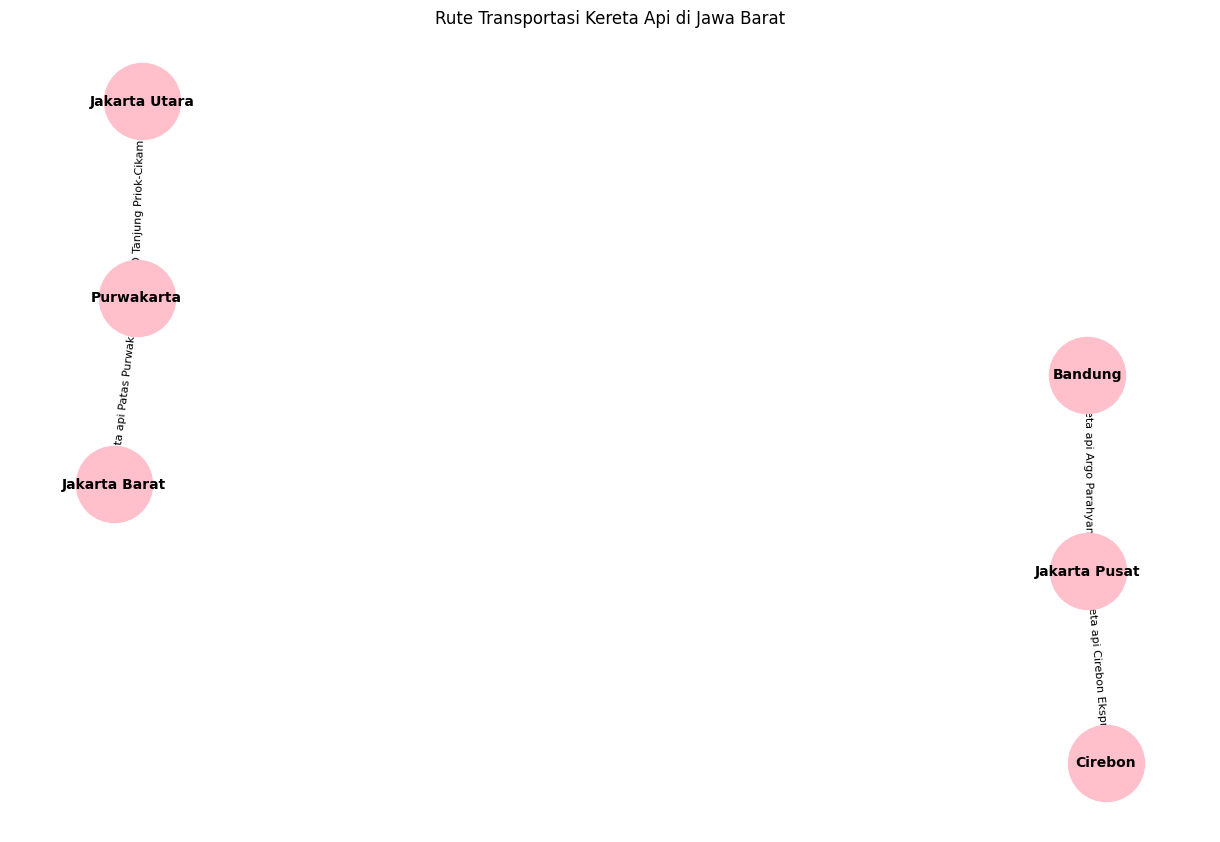

In [ ]:
pos = nx.spring_layout(G, iterations=100, scale=2)

plt.figure(figsize=(12, 8))

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('Rute Transportasi Kereta Api di Jawa Barat')
plt.show()

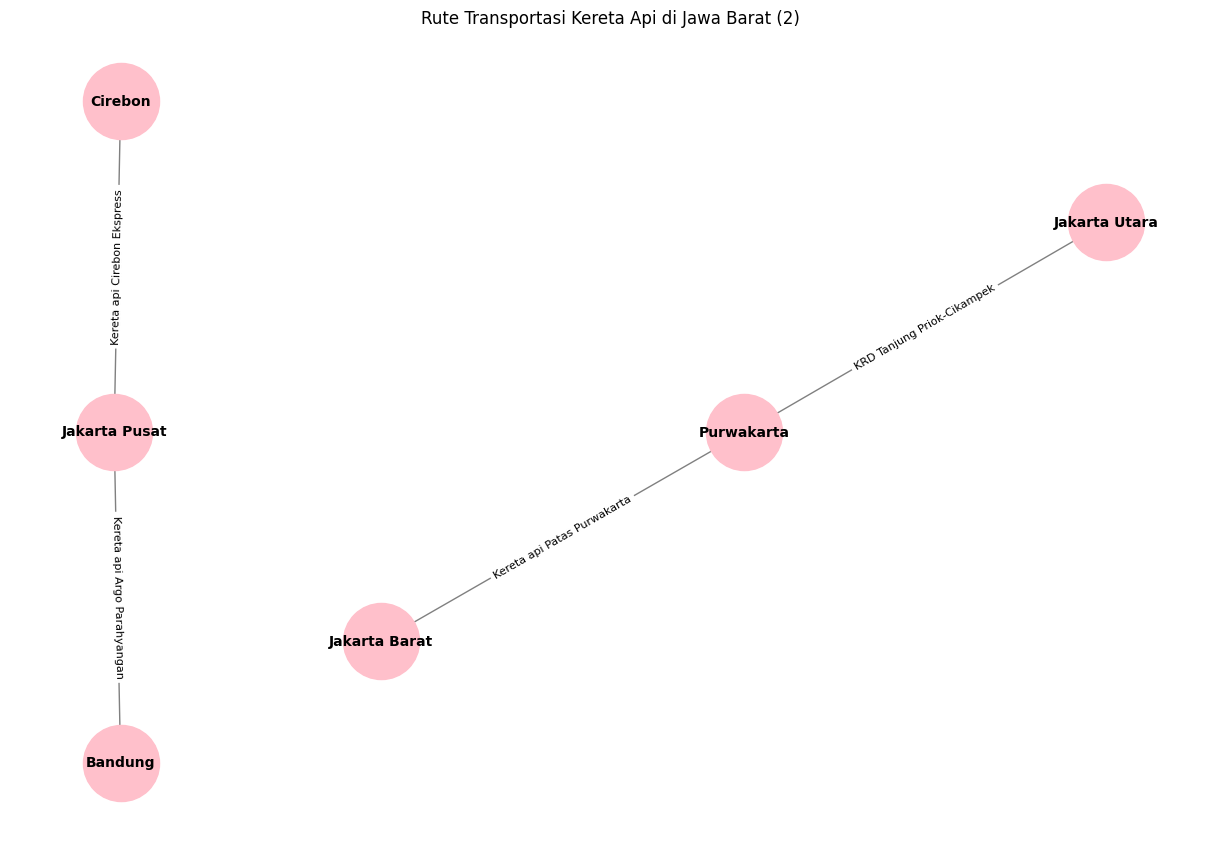

In [ ]:
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(12, 8))

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='pink', font_size=10, font_weight='bold', edge_color='gray')

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title('Rute Transportasi Kereta Api di Jawa Barat (2)')
plt.show()


**Menentukan Kota Terpenting Berdasarkan Nilai Degree Centrality dan Betweeness Centrality**

In [ ]:
degree_centrality = nx.degree_centrality(G)

betweenness_centrality = nx.betweenness_centrality(G)

centrality_df = pd.DataFrame({
    'City': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values())
})

In [ ]:
sorted_by_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False)
sorted_by_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)

print("Kota dengan Degree Centrality Tertinggi:")
print(sorted_by_degree.head())

print("\nKota dengan Betweenness Centrality Tertinggi:")
print(sorted_by_betweenness.head())

Kota dengan Degree Centrality Tertinggi:
            City  Degree Centrality  Betweenness Centrality
1     Purwakarta                0.4                     0.1
3  Jakarta Pusat                0.4                     0.1
0  Jakarta Utara                0.2                     0.0
2        Cirebon                0.2                     0.0
4        Bandung                0.2                     0.0

Kota dengan Betweenness Centrality Tertinggi:
            City  Degree Centrality  Betweenness Centrality
1     Purwakarta                0.4                     0.1
3  Jakarta Pusat                0.4                     0.1
0  Jakarta Utara                0.2                     0.0
2        Cirebon                0.2                     0.0
4        Bandung                0.2                     0.0


**Update Ukuran Node berdasarkan Nilai Degree Centrality**

In [ ]:
G = nx.Graph()

for index, row in df_west_java.iterrows():
    G.add_node(row['kota_kab_awal'])
    G.add_node(row['kota_kab_akhir'])
    G.add_edge(row['kota_kab_awal'], row['kota_kab_akhir'], label=row['kereta'])

degree_centrality = nx.degree_centrality(G)

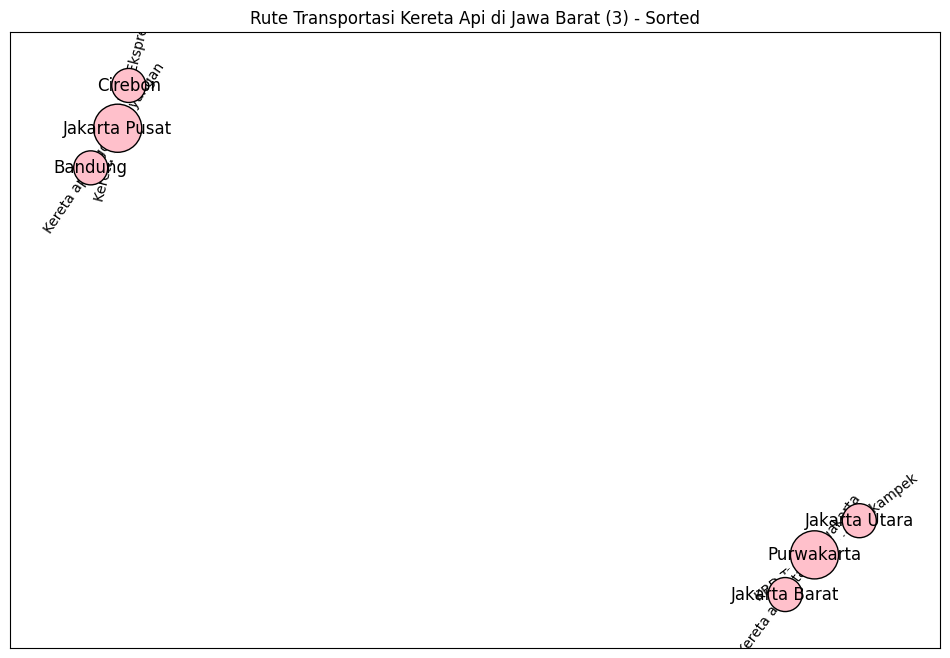

In [ ]:
node_sizes = [v * 3000 for v in degree_centrality.values()]

pos = nx.spring_layout(G, iterations=100, scale=3)

plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='pink', edgecolors='black')

nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title('Rute Transportasi Kereta Api di Jawa Barat (3) - Sorted')
plt.show()